In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 20)

In [2]:
terry_stops = pd.read_csv('./Terry_Stops.csv')


In [3]:
terry_stops.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Reported Date,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,-,-1,20140000120677,92317,Arrest,None,7500,1984,M,Black or African American,Asian,Male,2015-10-16T00:00:00,11:32:00,-,-,-,SOUTH PCT 1ST W - ROBERT,N,N,South,O,O2
1,-,-1,20150000001463,28806,Field Contact,None,5670,1965,M,White,-,-,2015-03-19T00:00:00,07:59:00,-,-,-,NaN,N,N,-,-,-
2,-,-1,20150000001516,29599,Field Contact,None,4844,1961,M,White,White,Male,2015-03-21T00:00:00,19:12:00,-,-,-,NaN,N,-,-,-,-
3,-,-1,20150000001670,32260,Field Contact,None,7539,1963,M,White,-,-,2015-04-01T00:00:00,04:55:00,-,-,-,NaN,N,N,-,-,-
4,-,-1,20150000001739,33155,Field Contact,None,6973,1977,M,White,Black or African American,Male,2015-04-03T00:00:00,00:41:00,-,-,-,NaN,N,N,-,-,-


In [4]:
terry_stops.shape

(43496, 23)

In [5]:
terry_stops['Call Type'].value_counts() # xxx: what do we do with missing data?

911                              19166
-                                12828
ONVIEW                            8205
TELEPHONE OTHER, NOT 911          3017
ALARM CALL (NOT POLICE ALARM)      274
TEXT MESSAGE                         3
PROACTIVE (OFFICER INITIATED)        2
SCHEDULED EVENT (RECURRING)          1
Name: Call Type, dtype: int64

In [6]:
terry_stops['Subject Age Group'].value_counts()

26 - 35         14424
36 - 45          9140
18 - 25          8877
46 - 55          5595
56 and Above     2183
1 - 17           1906
-                1371
Name: Subject Age Group, dtype: int64

In [7]:
# target

terry_stops['Arrested'] = np.where(terry_stops['Stop Resolution'] == 'Arrest', 1, 0)

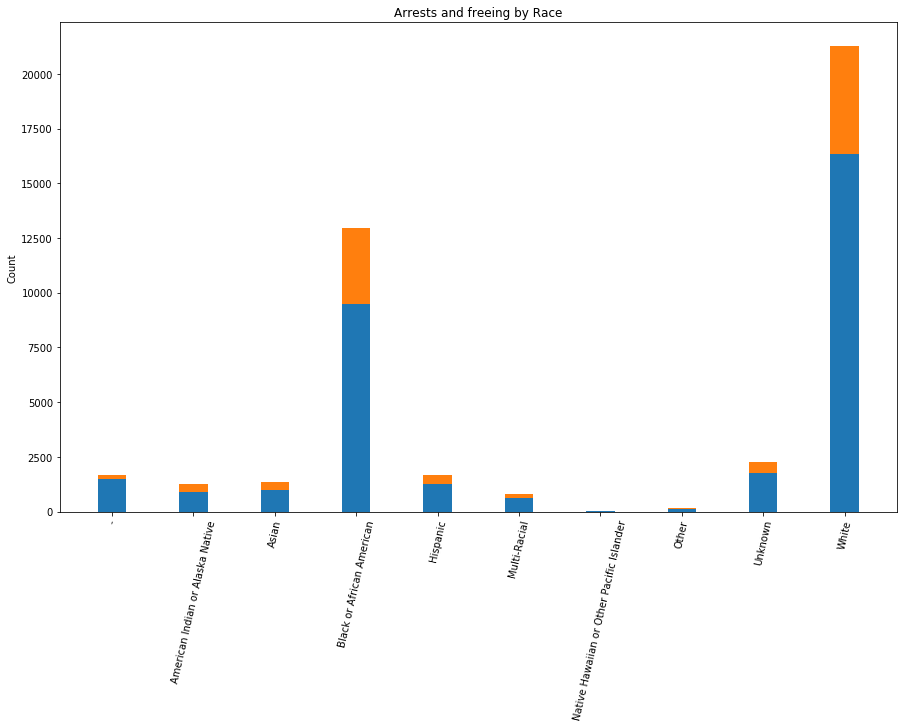

In [8]:
plot_df = terry_stops.groupby('Subject Perceived Race')['Arrested'].value_counts().unstack(1)

cols = plot_df.index
freed = plot_df[0].values
arrested = plot_df[1].values

fig, ax = plt.subplots(figsize=(15, 9))
width = 0.35 
ax.bar(cols, freed, width, label='Freed')  
ax.bar(cols, arrested, width, bottom=freed, label='Arrested')

plt.xticks(rotation=77)
ax.set_ylabel('Count')
ax.set_title('Arrests and freeing by Race');


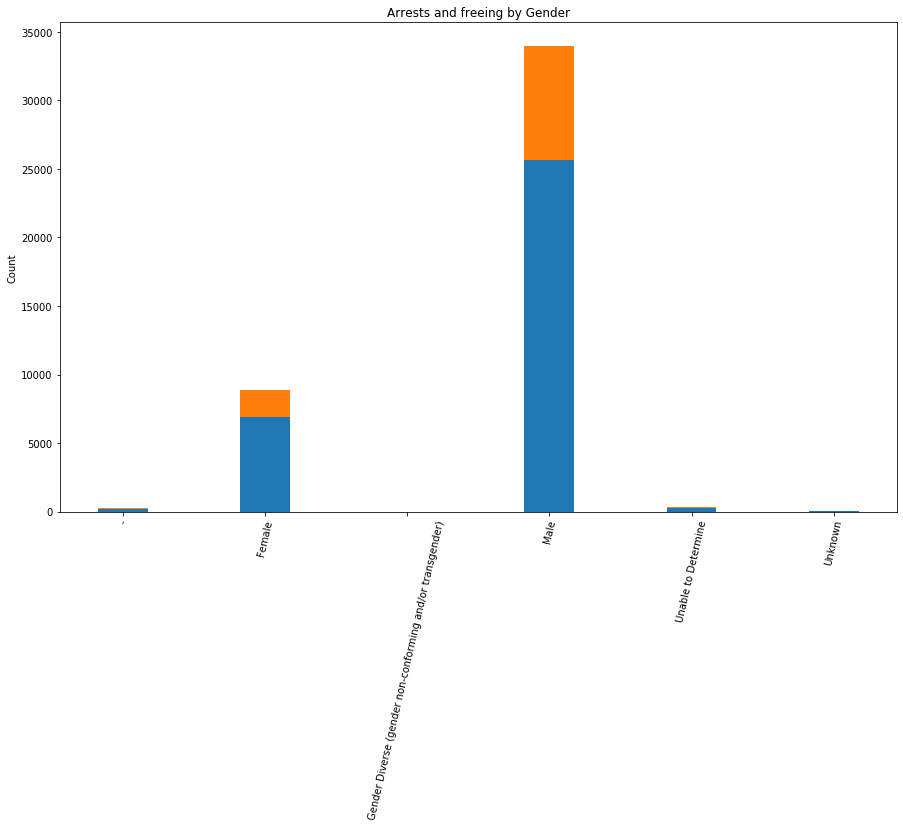

In [9]:
plot_df = terry_stops.groupby('Subject Perceived Gender')['Arrested'].value_counts().unstack(1)

cols = plot_df.index
freed = plot_df[0].values
arrested = plot_df[1].values

fig, ax = plt.subplots(figsize=(15, 9))
width = 0.35 
ax.bar(cols, freed, width, label='Freed')  
ax.bar(cols, arrested, width, bottom=freed, label='Arrested')

plt.xticks(rotation=77)
ax.set_ylabel('Count')
ax.set_title('Arrests and freeing by Gender');

## Data Cleaning


In [10]:
# Drop useless columns 

cols = ['Subject ID', 'Terry Stop ID', 'GO / SC Num', 'Officer ID', 'Stop Resolution']

df = terry_stops.drop(columns=cols, axis=1)

In [11]:
df.head()

,Subject Age Group,Weapon Type,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Reported Date,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat,Arrested
0,-,None,1984,M,Black or African American,Asian,Male,2015-10-16T00:00:00,11:32:00,-,-,-,SOUTH PCT 1ST W - ROBERT,N,N,South,O,O2,1
1,-,None,1965,M,White,-,-,2015-03-19T00:00:00,07:59:00,-,-,-,NaN,N,N,-,-,-,0
2,-,None,1961,M,White,White,Male,2015-03-21T00:00:00,19:12:00,-,-,-,NaN,N,-,-,-,-,0
3,-,None,1963,M,White,-,-,2015-04-01T00:00:00,04:55:00,-,-,-,NaN,N,N,-,-,-,0
4,-,None,1977,M,White,Black or African American,Male,2015-04-03T00:00:00,00:41:00,-,-,-,NaN,N,N,-,-,-,0


In [12]:
# map true/false values

df['Arrest Flag'] = np.where(df['Arrest Flag'] == 'Y', 1, 0)
df['Frisk Flag'] = np.where(df['Frisk Flag'] == 'Y', 1, 0)

## Feature Engineering

In [13]:
df.dtypes

Subject Age Group           object
Weapon Type                 object
Officer YOB                  int64
Officer Gender              object
Officer Race                object
Subject Perceived Race      object
Subject Perceived Gender    object
Reported Date               object
Reported Time               object
Initial Call Type           object
Final Call Type             object
Call Type                   object
Officer Squad               object
Arrest Flag                  int64
Frisk Flag                   int64
Precinct                    object
Sector                      object
Beat                        object
Arrested                     int64
dtype: object

In [14]:
df['Officer Age'] = (pd.to_datetime(df['Reported Date']) - pd.to_datetime(df['Officer YOB'])).dt.days
df.drop('Officer YOB', inplace=True, axis=1)

In [15]:
df['Officer Age']

0        16723
1        16512
2        16514
3        16525
4        16527
         ...  
43491    18454
43492    18463
43493    18468
43494    18477
43495    18482
Name: Officer Age, Length: 43496, dtype: int64

In [16]:
# get useful time values

df['Reported Month'] = df['Reported Date'].apply(pd.to_datetime).dt.month
df['Reported Hour'] = df['Reported Time'].apply(pd.to_datetime).dt.hour

df.drop(['Reported Date', 'Reported Time'], axis=1, inplace=True)

In [17]:
# generate dummy variables on categorical data

df =  pd.get_dummies(df, columns=['Officer Race', 'Officer Gender', 'Subject Perceived Race', 
'Subject Perceived Gender', 'Weapon Type', 'Subject Age Group', 'Initial Call Type', 'Final Call Type', 
'Call Type', 'Officer Squad', 'Precinct', 'Sector', 'Beat'], drop_first=True) # xxx: how to deal with columns that are datetime?



In [18]:
df.shape

(43496, 734)

In [19]:
X = df.drop('Arrested', axis=1)
y = df.Arrested

np.nan_to_num(X)
np.nan_to_num(y)

array([1, 0, 0, ..., 1, 0, 0])

In [20]:
df.dtypes

Arrest Flag       int64
Frisk Flag        int64
Arrested          int64
Officer Age       int64
Reported Month    int64
                  ...  
Beat_W1           uint8
Beat_W2           uint8
Beat_W2           uint8
Beat_W3           uint8
Beat_W3           uint8
Length: 734, dtype: object

## Build Models

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)


In [22]:
X_train

,Arrest Flag,Frisk Flag,Officer Age,Reported Month,Reported Hour,Officer Race_Asian,Officer Race_Black or African American,Officer Race_Hispanic or Latino,Officer Race_Nat Hawaiian/Oth Pac Islander,Officer Race_Not Specified,Officer Race_Two or More Races,Officer Race_Unknown,Officer Race_White,Officer Gender_M,Officer Gender_N,Subject Perceived Race_American Indian or Alaska Native,Subject Perceived Race_Asian,Subject Perceived Race_Black or African American,Subject Perceived Race_Hispanic,Subject Perceived Race_Multi-Racial,Subject Perceived Race_Native Hawaiian or Other Pacific Islander,Subject Perceived Race_Other,Subject Perceived Race_Unknown,Subject Perceived Race_White,Subject Perceived Gender_Female,Subject Perceived Gender_Gender Diverse (gender non-conforming and/or transgender),Subject Perceived Gender_Male,Subject Perceived Gender_Unable to Determine,Subject Perceived Gender_Unknown,Weapon Type_Automatic Handgun,Weapon Type_Blackjack,Weapon Type_Blunt Object/Striking Implement,Weapon Type_Brass Knuckles,Weapon Type_Club,"Weapon Type_Club, Blackjack, Brass Knuckles",Weapon Type_Fire/Incendiary Device,Weapon Type_Firearm,Weapon Type_Firearm (unk type),Weapon Type_Firearm Other,Weapon Type_Handgun,Weapon Type_Knife/Cutting/Stabbing Instrument,Weapon Type_Lethal Cutting Instrument,Weapon Type_Mace/Pepper Spray,Weapon Type_None,Weapon Type_None/Not Applicable,Weapon Type_Other Firearm,Weapon Type_Rifle,Weapon Type_Shotgun,Weapon Type_Taser/Stun Gun,Subject Age Group_1 - 17,Subject Age Group_18 - 25,Subject Age Group_26 - 35,Subject Age Group_36 - 45,Subject Age Group_46 - 55,Subject Age Group_56 and Above,Initial Call Type_-ASSIGNED DUTY - FOOT BEAT (FROM ASSIGNED CAR),Initial Call Type_-ASSIGNED DUTY - STAKEOUT,"Initial Call Type_ALARM - ATM MACHINE, FREE STANDING",Initial Call Type_ALARM - AUDIBLE AUTOMOBILE (UNOCC/ANTI-THEFT),Initial Call Type_ALARM - BANK (HOLD-UP),"Initial Call Type_ALARM - COMM, HOLD-UP/PANIC (EXCEPT BANKS)","Initial Call Type_ALARM - COMM, SILENT/AUD BURG (INCL BANKS)","Initial Call Type_ALARM - RESIDENTIAL - BURGLARY, SILENT/AUDIBLE",Initial Call Type_ALARM - RESIDENTIAL - SILENT/AUD PANIC/DURESS,"Initial Call Type_ANIMAL - INJURED, DEAD HAZARD, OTHER",Initial Call Type_ANIMAL - IP/JO - BITE,"Initial Call Type_ANIMAL, REPORT - BITE",Initial Call Type_ARSON - IP/JO,Initial Call Type_ARSON - REPORT,Initial Call Type_ASLT - DV,Initial Call Type_ASLT - IP/JO - DV,Initial Call Type_ASLT - IP/JO - PERSON SHOT OR SHOT AT,Initial Call Type_ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS),"Initial Call Type_ASLT - MOLESTED ADULT (GROPED, FONDLED, ETC.)",Initial Call Type_ASLT - PERSON SHOT OR SHOT AT,Initial Call Type_ASLT - WITH OR W/O WEAPONS (NO SHOOTINGS),Initial Call Type_ASSIST OTHER AGENCY - EMERGENCY SERVICE,Initial Call Type_ASSIST OTHER AGENCY - ROUTINE SERVICE,Initial Call Type_ASSIST PUBLIC - NO WELFARE CHK OR DV ORDER SERVICE,Initial Call Type_ASSIST SPD - ROUTINE SERVICE,Initial Call Type_ASSIST SPD - URGENT SERVICE,"Initial Call Type_AUTO - THEFT/LOSS, PLATES AND/OR TAB",Initial Call Type_AUTO RECOVERY,Initial Call Type_AUTO THEFT - VEH THEFT OR THEFT & RECOVERY,"Initial Call Type_AUTO THEFT-IP/JO - VEHICLE, PLATES, TABS",Initial Call Type_AWOL - ADULT OR JUVENILE,"Initial Call Type_BIAS -RACIAL, POLITICAL, SEXUAL MOTIVATION",Initial Call Type_BOMB THREATS - IP/JO,Initial Call Type_BURG - COMM BURGLARY (INCLUDES SCHOOLS),Initial Call Type_BURG - IP/JO - COMM BURG (INCLUDES SCHOOLS),Initial Call Type_BURG - IP/JO - RES (INCL UNOCC STRUCTURES),Initial Call Type_BURG - RES (INCL UNOCC STRUCTURES ON PROP),Initial Call Type_BURN - RECKLESS BURNING,Initial Call Type_CARJACKING - IP/JO - ROBBERY,Initial Call Type_CARJACKING - ROBBERY,Initial Call Type_CHILD - LURING,"Initial Call Type_CHILD - ABAND, ABUSED, MOLESTED, NEGLECTED","Initial Call Type_CHILD - IP/JO - ABAND, ABUSE, MOLEST, NEGLECT",Initial Call Type_CHILD - IP/JO - LURING,Initial Call Type_DEMONSTRATIONS,Initial Call Type_DIRECTED PATRO

In [23]:
#knn
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X_train, y_train)

knn_preds = knn.predict(X_test)

knn_f1 = metrics.f1_score(y_test, knn_preds)

print(knn_f1)

0.10294615645106672


In [24]:
# logistic regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced')

lr.fit(X_train, y_train)

lr_pred_train = lr.predict(X_train)

lr_preds = lr.predict(X_test)

lr_f1 = metrics.f1_score(y_test, lr_preds)

print(lr_f1)

0.7434420985284709


In [25]:
# decision tree
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=5, class_weight='balanced')

dtc.fit(X_train, y_train)

dtc_preds  = dtc.predict(X_test)

dtc_f1 = metrics.f1_score(y_test, dtc_preds)

print(dtc_f1)

0.6238137416171075


In [26]:
# decision tree
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=4, class_weight='balanced')

dtc.fit(X_train, y_train)

dtc_preds  = dtc.predict(X_test)

dtc_f1 = metrics.f1_score(y_test, dtc_preds)

print(dtc_f1)


0.6005890639006274
